In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
import numpy as np
import keras

In [2]:
data = pd.read_csv('dane/main data/hydro_klimat_merged_data.csv')

In [3]:
data['Data'] = pd.to_datetime(data['Data'])

In [4]:
data.sort_values(by='Data', inplace=True)

In [5]:
# data_ina = data[['Nazwa stacji', 'Data', 'Stan wody [cm]', \
#                 'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
#                'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
#                 'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
#                 'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
#                ]][data['Nazwa rzeki/jeziora'] == 'INA (198)']

# data_san = data[['Nazwa stacji', 'Data',  'Stan wody [cm]',\
#                 'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
#                'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
#                 'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
#                 'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
#                ]][data['Nazwa rzeki/jeziora'] == 'SAN (22)'] 

data_bug= data[['Nazwa stacji', 'Data',  'Stan wody [cm]',\
                'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
               'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
                'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
                'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
               ]][data['Nazwa rzeki/jeziora'] == 'BUG (266)'] 

In [6]:
# data[['Nazwa stacji', 'Nazwa rzeki/jeziora']].drop_duplicates()\
#     .sort_values(by='Nazwa stacji', inplace=False)

one-hot encoding rodzaj opadu

Zastosowano one-hot encoding na kolumnie ‘Rodzaj opadu’, ponieważ model LSTM wymaga danych liczbowych.

In [7]:
# data_ina['Rodzaj opadu [S/W/]'] = data_ina['Rodzaj opadu [S/W/]'].fillna('no_precip')
# encoded = pd.get_dummies(data_ina['Rodzaj opadu [S/W/]'], prefix='opad')
# data_ina = data_ina.join(encoded)

# data_san['Rodzaj opadu [S/W/]'] = data_san['Rodzaj opadu [S/W/]'].fillna('no_precip')
# encoded = pd.get_dummies(data_san['Rodzaj opadu [S/W/]'], prefix='opad')
# data_san = data_san.join(encoded)

data_bug['Rodzaj opadu [S/W/]'] = data_bug['Rodzaj opadu [S/W/]'].fillna('no_precip')
encoded = pd.get_dummies(data_bug['Rodzaj opadu [S/W/]'], prefix='opad')
data_bug = data_bug.join(encoded)

In [8]:
# dzien_san = data_san['Data']
# suma_opadow_san = data_san['Suma dobowa opadów nowa [mm]']
# poziom_wody_san = data_san['Stan wody [cm]']
# przeplyw_san = data_san['Przepływ [m^3/s]']
# temp_sr_san = data_san['Średnia temperatura dobowa [°C]']
# pokr_sn_san = data_san['Wysokość pokrywy śnieżnej [cm]']
# temp_min_grunt_san = data_san['Temperatura minimalna przy gruncie [°C]']

In [9]:
# dzien_ina = data_ina['Data']
# suma_opadow_ina = data_ina['Suma dobowa opadów nowa [mm]']
# poziom_wody_ina = data_ina['Stan wody [cm]']
# przeplyw_ina = data_ina['Przepływ [m^3/s]']
# temp_sr_ina = data_ina['Średnia temperatura dobowa [°C]']
# pokr_sn_ina = data_ina['Wysokość pokrywy śnieżnej [cm]']
# temp_min_grunt_ina = data_ina['Temperatura minimalna przy gruncie [°C]']

In [10]:
dzien_bug = data_bug['Data']
suma_opadow_bug = data_bug['Suma dobowa opadów nowa [mm]']
poziom_wody_bug = data_bug['Stan wody [cm]']
przeplyw_bug = data_bug['Przepływ [m^3/s]']
temp_sr_bug = data_bug['Średnia temperatura dobowa [°C]']
pokr_sn_bug = data_bug['Wysokość pokrywy śnieżnej [cm]']
temp_min_grunt_bug = data_bug['Temperatura minimalna przy gruncie [°C]']

Wykres poziom wód w czasie

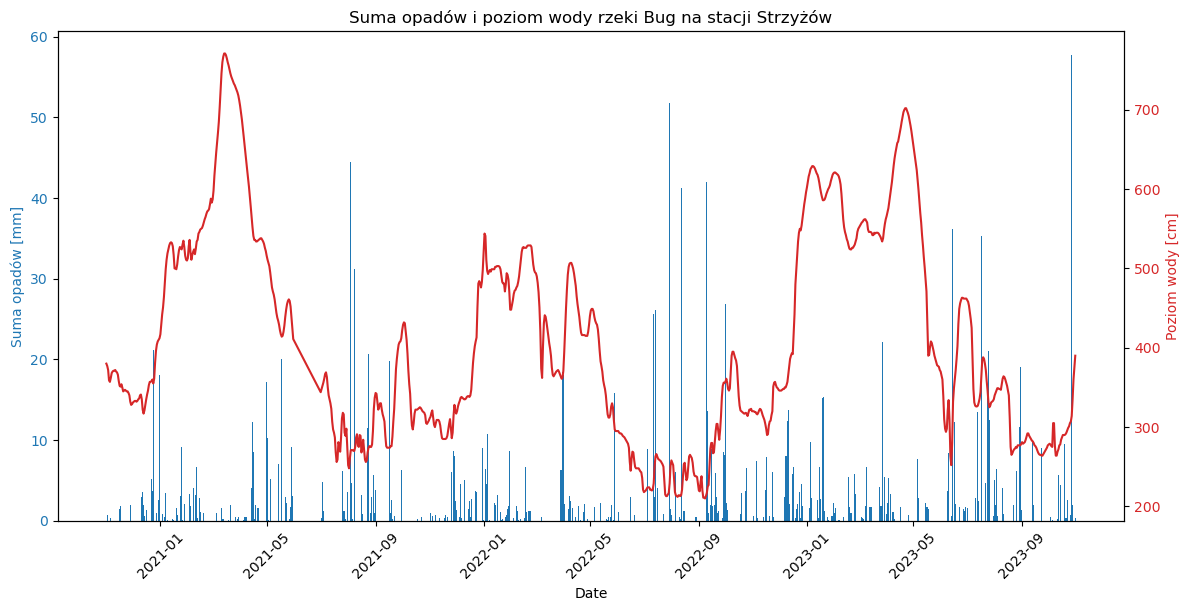

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Suma opadów [mm]', color=color)
# ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
ax1.bar(dzien_bug, suma_opadow_bug, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# #ustawienie osi X
# ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
plt.xticks(rotation=45)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Poziom wody [cm]', color=color)
ax2.plot(dzien_bug, poziom_wody_bug, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure no overlap of y-axis labels
plt.title('Suma opadów i poziom wody rzeki Bug na stacji Strzyżów')
plt.show()

Wykres za ostatnie 100 dni

In [12]:
data_bug_100 = data_bug.sort_values(by=['Data'])[-100:]
dzien_bug_100 = data_bug_100['Data']
suma_opadow_bug_100 = data_bug_100['Suma dobowa opadów nowa [mm]']
poziom_wody_bug_100 = data_bug_100['Stan wody [cm]']
przeplyw_bug_100 = data_bug_100['Przepływ [m^3/s]']
temp_sr_bug_100 = data_bug_100['Średnia temperatura dobowa [°C]']
pokr_sn_bug_100 = data_bug_100['Wysokość pokrywy śnieżnej [cm]']
temp_min_grunt_bug_100 = data_bug_100['Temperatura minimalna przy gruncie [°C]']

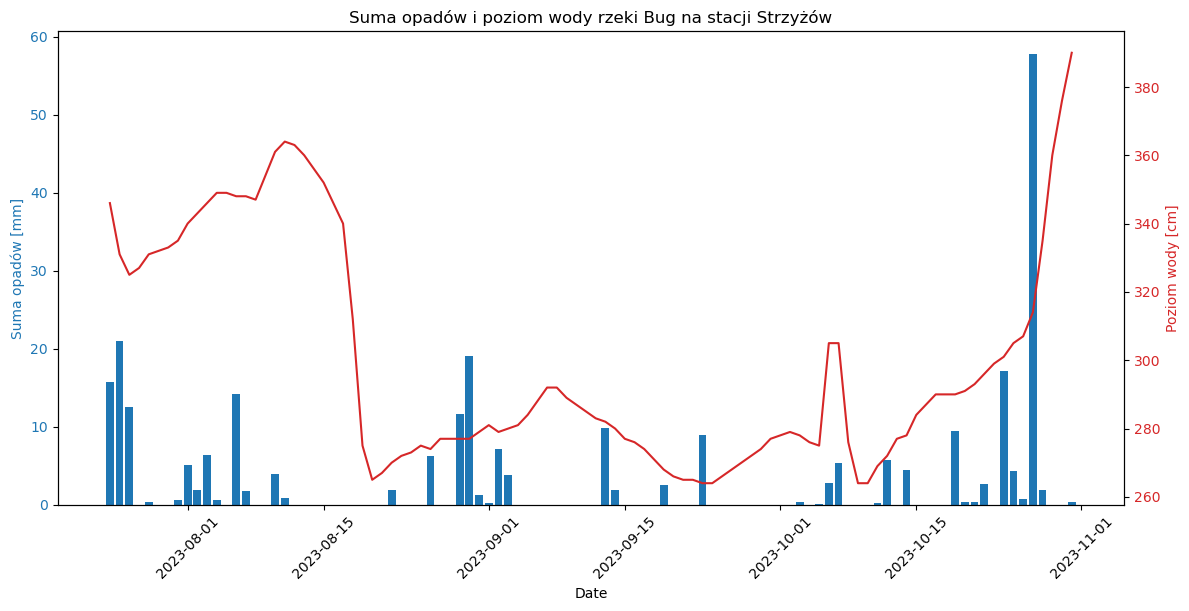

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Suma opadów [mm]', color=color)
# ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
ax1.bar(dzien_bug_100, suma_opadow_bug_100, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# #ustawienie osi X
# ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
plt.xticks(rotation=45)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Poziom wody [cm]', color=color)
ax2.plot(dzien_bug_100, poziom_wody_bug_100, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure no overlap of y-axis labels
plt.title('Suma opadów i poziom wody rzeki Bug na stacji Strzyżów')
plt.show()

Wizualizacja train/test/valid z datami

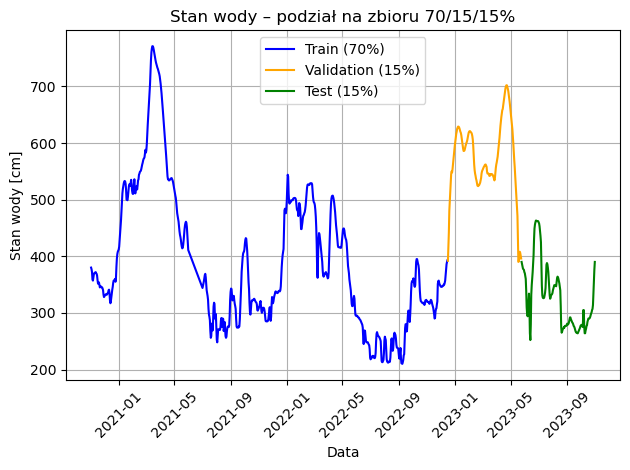

In [14]:
total_samples_bug = len(data_bug)
train_end_bug = int(total_samples_bug * 0.7)
validation_end_bug = int(total_samples_bug * 0.85)

train_bug = data_bug[:train_end_bug]
validation_bug = data_bug[train_end_bug:validation_end_bug]
test_bug = data_bug[validation_end_bug:]

plt.plot(train_bug['Data'], train_bug['Stan wody [cm]'],
         color='blue', label='Train (70%)')

# Validation
plt.plot(validation_bug['Data'], validation_bug['Stan wody [cm]'],
         color='orange', label='Validation (15%)')

# Test
plt.plot(test_bug['Data'], test_bug['Stan wody [cm]'],
         color='green', label='Test (15%)')

# Opisy osi
plt.xlabel('Data')
plt.ylabel('Stan wody [cm]')
plt.title('Stan wody – podział na zbioru 70/15/15%')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Usunięcie niepotrzebnych kolumn (wartosci nienumeryczne)

In [15]:
# data_ina = data_ina.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji',\
#                                   'Temperatura wody [st. C]'])

# data_san = data_san.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji', \
#                                   'Temperatura wody [st. C]'])

data_bug = data_bug.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji', 'opad_no_precip'])

Podział zbioru

Podział na train, valid, test w proporcji 70/15/15

In [16]:
total_samples_bug = len(data_bug)
train_end_bug = int(total_samples_bug * 0.7)
validation_end_bug = int(total_samples_bug * 0.85)

train_bug = data_bug[:train_end_bug]
validation_bug = data_bug[train_end_bug:validation_end_bug]
test_bug = data_bug[validation_end_bug:]

In [17]:
train_bug

,Stan wody [cm],Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów nowa [mm],Wysokość pokrywy śnieżnej [cm],Przepływ [m^3/s],Temperatura wody [st. C],opad_S,opad_W
18688,380,10.2,4.1,6.1,2.1,0.0,0,28.1,10.6,0,0
18689,377,9.2,-1.4,4.8,-2.9,0.7,0,27.8,10.0,0,1
18690,372,13.2,8.5,10.6,8.0,2.2,0,26.9,9.8,0,1
18691,359,12.9,10.0,10.9,10.0,4.0,0,24.9,10.0,0,1
18692,357,11.7,4.1,6.6,0.6,0.0,0,24.6,10.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19428,367,0.4,-2.8,-1.6,-2.9,13.7,15,28.1,2.0,1,0
19429,378,-1.1,-4.3,-2.9,-3.4,2.1,25,30.1,1.8,1,0
19430,386,-1.6,-5.2,-3.2,-6.4,0.5,24,31.6,1.0,1,0
19431,390,-3.4,-17.6,-10.1,-19.1,3.7,21,32.4,0.1,1,0


In [18]:
print(len(train_bug), len(validation_bug), len(test_bug))

745 160 160


### Metoda naiwna na zbiorze walidacyjnym

In [19]:
y_validation = validation_bug.iloc[0]
y_test = test_bug.iloc[0]

In [20]:
#na całości, kod z DL Chollet strona 222
def evaluate_naive_method_valid():
    batch_maes = []
    for i, step in enumerate(range(len(y_validation)-1)):
        preds, targets = y_validation[i], y_validation[i+1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_valid())
#gdyby patrzeć tylko na dzień poprzedni o ile średnio taki wynik by się mylił (uwaga! miara mae taka jak w modelu!)

48.14


In [21]:
def evaluate_naive_method_test():
    batch_maes = []
    for i, step in enumerate(range(len(y_test)-1)):
        preds, targets = y_test[i], y_test[i+1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_test())

47.02


#### Utworzenie sekwencji, aby można było predykować na szeregach czasowych 

In [22]:
def create_sequences(input_data, n_steps, n_ahead=1):
    X, y = [], []
    for i in range(len(input_data) - n_steps - n_ahead + 1):
        #indeks końca sekwencji
        end_ix = i + n_steps
        #Tworzenie sekwencji
        seq_x = input_data[i:end_ix, :]  # cechy i poziom wod w sekwencji wybranej dlugosci
        seq_y = input_data[end_ix+n_ahead-1, 0]  # poziom wód nastepnego dnia (lub nastepnego n_ahead dni dalej) po zakresie w wektorze cech
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Wybór sekwencji

In [23]:
train_bug

,Stan wody [cm],Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów nowa [mm],Wysokość pokrywy śnieżnej [cm],Przepływ [m^3/s],Temperatura wody [st. C],opad_S,opad_W
18688,380,10.2,4.1,6.1,2.1,0.0,0,28.1,10.6,0,0
18689,377,9.2,-1.4,4.8,-2.9,0.7,0,27.8,10.0,0,1
18690,372,13.2,8.5,10.6,8.0,2.2,0,26.9,9.8,0,1
18691,359,12.9,10.0,10.9,10.0,4.0,0,24.9,10.0,0,1
18692,357,11.7,4.1,6.6,0.6,0.0,0,24.6,10.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19428,367,0.4,-2.8,-1.6,-2.9,13.7,15,28.1,2.0,1,0
19429,378,-1.1,-4.3,-2.9,-3.4,2.1,25,30.1,1.8,1,0
19430,386,-1.6,-5.2,-3.2,-6.4,0.5,24,31.6,1.0,1,0
19431,390,-3.4,-17.6,-10.1,-19.1,3.7,21,32.4,0.1,1,0


In [24]:
#uwaga zmiana typu danych!!
train_bug = train_bug.to_numpy()
validation_bug = validation_bug.to_numpy()
test_bug = test_bug.to_numpy()

In [25]:
n_steps = 1 #długość sekwencji

X_train, y_train = create_sequences(train_bug, n_steps=n_steps, n_ahead=1)
X_validation, y_validation = create_sequences(validation_bug, n_steps=n_steps, n_ahead=1)
X_test, y_test = create_sequences(test_bug, n_steps=n_steps, n_ahead=1)

In [26]:
X_train[0]

array([[380. ,  10.2,   4.1,   6.1,   2.1,   0. ,   0. ,  28.1,  10.6,
          0. ,   0. ]])

Przykładowe sekwencje

In [27]:
# df = pd.DataFrame({
#     'y': [7, 4, 3, 2, 1],
#     'x': [5, 2, 1, 3, 8]    
# })

# df

# # Zamiana na numpy array
# data = df.to_numpy()

# # Wywołanie funkcji
# n_steps = 1
# n_ahead = 1
# X, y = create_sequences(data, n_steps=n_steps, n_ahead=n_ahead)

# # Wyświetlenie wyników
# print("Dane wejściowe:")
# print(df)
# print("\nSekwencje X:")
# print(X)
# print("\nCele y:")
# print(y)

In [28]:
# X.shape

Normalizacja zbioru treningowego

In [29]:
X_train.shape #drugi wymiar to n_steps

(744, 1, 11)

In [30]:
n_train, steps, features = X_train.shape
print(features)
print(X_train.reshape(-1, features).shape)
X_train.reshape(-1, features)

11
(744, 11)


array([[ 3.80e+02,  1.02e+01,  4.10e+00, ...,  1.06e+01,  0.00e+00,
         0.00e+00],
       [ 3.77e+02,  9.20e+00, -1.40e+00, ...,  1.00e+01,  0.00e+00,
         1.00e+00],
       [ 3.72e+02,  1.32e+01,  8.50e+00, ...,  9.80e+00,  0.00e+00,
         1.00e+00],
       ...,
       [ 3.78e+02, -1.10e+00, -4.30e+00, ...,  1.80e+00,  1.00e+00,
         0.00e+00],
       [ 3.86e+02, -1.60e+00, -5.20e+00, ...,  1.00e+00,  1.00e+00,
         0.00e+00],
       [ 3.90e+02, -3.40e+00, -1.76e+01, ...,  1.00e-01,  1.00e+00,
         0.00e+00]])

In [31]:
from sklearn.preprocessing import StandardScaler

#Zakładamy, że dane mają kształt: (próbki, kroki_czasowe, cechy)
n_train, steps, features = X_train.shape
n_val = X_validation.shape[0]
n_test = X_test.shape[0]

# Przekształcenie do 2D (scalanie kroków czasowych i próbek)
X_train_2d = X_train.reshape(-1, features)
X_val_2d = X_validation.reshape(-1, features)
X_test_2d = X_test.reshape(-1, features)

#Skalowanie
scaler = StandardScaler()
# StandardScaler oblicza średnią i odchylenie tylko z danych treningowych (fit_transform)
X_train_scaled = scaler.fit_transform(X_train_2d) 
#Potem tę samą skalę stosujemy do walidacji i testu (transform) (ochrona przed data_leakage)
X_val_scaled = scaler.transform(X_val_2d)
X_test_scaled = scaler.transform(X_test_2d)

# Przywrócenie oryginalnych kształtów
X_train = X_train_scaled.reshape(n_train, steps, features)
X_validation = X_val_scaled.reshape(n_val, steps, features)
X_test = X_test_scaled.reshape(n_test, steps, features)

Zmiana na funkcje i skalowanie też zmiennej celu

In [48]:
# from sklearn.preprocessing import StandardScaler

# def scaleData(train, validation, test):
# #Zakładamy, że dane mają kształt: (próbki, kroki_czasowe, cechy)
#     n_val = validation.shape[0]
#     n_test = test.shape[0]
#     if len(train.shape) == 3:
#         n_train, steps, features = train.shape
#          # Przekształcenie do 2D (scalanie kroków czasowych i próbek)
#         train_2d = train.reshape(-1, features)
#         val_2d = validation.reshape(-1, features)
#         test_2d = test.reshape(-1, features)
#     else:
#         n_train = train.shape[0]
#         train_2d = train
#         val_2d = validation
#         test_2d = test

#     #Skalowanie
#     scaler = StandardScaler()
#     # StandardScaler oblicza średnią i odchylenie tylko z danych treningowych (fit_transform)
#     train_scaled = scaler.fit_transform(train_2d) 
#     #Potem tę samą skalę stosujemy do walidacji i testu (transform) (ochrona przed data_leakage)
#     val_scaled = scaler.transform(val_2d)
#     test_scaled = scaler.transform(test_2d)

#     # Przywrócenie oryginalnych kształtów
#     if n_train == 3:
#         train = train_scaled.reshape(n_train, steps, features)
#         validation = val_scaled.reshape(n_val, steps, features)
#         test = test_scaled.reshape(n_test, steps, features)
#     else:
#         train = train_scaled.reshape(1, -1)
#         validation = val_scaled.reshape(1, -1)
#         test = test_scaled.reshape(1, -1)
#     return train, validation, test

In [35]:
# X_train, X_validation, X_test = scaleData(X_train, X_validation, X_test)

In [50]:
# y_train, y_validation, y_test = scaleData(y_train, y_validation, y_test)

In [38]:
y_train.shape

(744,)

In [37]:
X_train.shape

(744, 1, 11)

In [36]:
# mean_train_san = train_san.mean(axis=0)
# train_san -= mean_train_san
# std_san = train_san.std(axis=0)
# train_san /= std_san

In [37]:
#sprawdzenie zmienności zmiennej celu
print(y_train.min(), y_train.max())
print(np.mean(y_train), np.std(y_train))
#zmienność nei jest zbyt duża, dlatego nie skaluję na razie

210.0 771.0
388.1962365591398 121.83777195110125


In [38]:
# #do ewentulanego przetestowania czy poprawi wyniki
# from sklearn.preprocessing import StandardScaler

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
# y_val_scaled = y_scaler.transform(y_validation.reshape(-1, 1))
# y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))


Punkt odniesienia (sprawdzenie y_train_san, jaki będzie błąd, gdy przyjmiemy, że poziom jutro będzie taki sam jak dziś)

miara błędu MAE

In [39]:
# np.mean(np.abs(y_validation[-2]-y_validation[-1]))

In [40]:
#czyli na danych nienormalizowanych 
# 0.44248616167015586 * np.std(validation_san[:, 1]) #musi być san bo sprawdam std przed walidacją
# 3.8cm

In [41]:
# validation_san[:, 1]

In [42]:
# #na całości, kod z DL Chollet strona 222
# def evaluate_naive_method():
#     batch_maes = []
#     for i, step in enumerate(range(len(y_validation)-1)):
#         preds, targets = y_validation[i], y_validation[i+1]
#         mae = np.mean(np.abs(preds - targets))
#         batch_maes.append(mae)
#     return np.mean(batch_maes)
    
# print(evaluate_naive_method())
# #gdyby patrzeć tylko na dzień poprzedni o ile średnio taki wynik by się mylił (uwaga! miara mae taka jak w modelu!)

Płaska sieć z jedną gęstą warstwą (str 494 ML)

In [43]:
X_train.shape[-1]

11

In [44]:
# # from keras.models import Sequential
# # from keras import layers
# # from keras.layers import Flatten, Dense
# import keras

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[n_steps, X_train.shape[-1]]), #input_shape = (timesteps, features)
#     keras.layers.Dense(1)
# ])

# model.compile(optimizer='adam', loss='mae')

In [45]:
# history = model.fit(
#     X_train, y_train,
#     epochs=20,
#     validation_data=(X_validation, y_validation)
# )

In [46]:
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Training History')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

In [47]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
# plt.title('Strata trenowania i walidacji')
# plt.legend()

# plt.show()

In [48]:
min(val_loss)

NameError: name 'val_loss' is not defined

Prosty model rekurencyjny

In [ ]:
X_train.shape

In [ ]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# # import keras

# model = keras.models.Sequential([
#     keras.layers.SimpleRNN(1, input_shape=[None, X_train.shape[2]]) #tutaj daję wartość none, żeby mogła wykryć zalezności czasowe
# ])

# model.compile(optimizer='adam', loss='mae')

In [ ]:
# history = model.fit(
#     X_train, y_train,
#     epochs=30,
#     validation_data=(X_validation, y_validation)
# )

In [ ]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
# plt.title('Strata trenowania i walidacji')
# plt.legend()

# plt.show()

In [ ]:
# min(val_loss) #źle to wygląda

Prosty model LSTM

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2])),  # '2' represents the number of features in each time step
#     keras.layers.BatchNormalization(), nie poprawiła
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=300, #widać, że więcej warstw moze pomóc
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss) # o wiele lepiej, ale gorzej niż wartość bazowa

Model ze stosem warstw rekurencyjnych

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu'),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss)

Lstm ze stosem warstw z mniejszą liczbą neuronów w każdej

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss)

Lstm ze stosem większej liczby warstw

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss) 

Model lstm jak w ML STR  503 (modyfikacja zmiana f. aktywacji)

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(32,activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True),
    keras.layers.LSTM(20,activation='relu' ),  # return_sequences=False (domyślnie)
    keras.layers.Dense(1) # keras.layers.TimeDistributed(keras.layers.Dense(1)) dawał by y_predict jako (batch_size, n_steps, 1)
])


model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss)

### optymalizacja hiperparametrów 3 najlepszych modeli

#### model nr 1

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError

# Budowanie modelu z przestrzenią hiperparametrów
def build_model_1(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=64, step=8),
        activation='relu',
        return_sequences = True,
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm2', min_value=8, max_value=32, step=4),
        activation='relu',
        return_sequences = True
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm3', min_value=4, max_value=16, step=2),
        activation='relu',
        return_sequences = True
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm4', min_value=4, max_value=16, step=2),
        activation='relu'
    ))
    
    # Gęsta warstwa
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=8, step=2),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_1,
    objective='val_loss',
    max_trials=10,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, {best_hps.get('units_lstm2')},\
{best_hps.get('units_lstm3')},{best_hps.get('units_lstm4')}, Dense: {best_hps.get('units_dense')},\
LR: {best_hps.get('learning_rate')}")


In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(48, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(12, activation='relu', return_sequences=True),
    keras.layers.LSTM(14, activation='relu', return_sequences=True),
    keras.layers.LSTM(4, activation='relu'),
    keras.layers.Dense(7, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.006695608114388132)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

#### model nr 2 miał te same wartswy co 1, więc zawiera sie w powyzszej hiperoptymalizacji

#### Model 3

In [ ]:
# Budowanie modelu z przestrzenią hiperparametrów
def build_model_3(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=64, step=8),
        activation='relu',
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=8, step=2),
        activation='relu'
    ))
    
    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_3,
    objective='val_loss',
    max_trials=15,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, Dense: {best_hps.get('units_dense')},\
LR: {best_hps.get('learning_rate')}")


In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(40,activation='relu', input_shape=(n_steps, X_train.shape[2])),
    keras.layers.Dense(7, activation="relu"),
    keras.layers.Dense(1) 
])

optimizer = keras.optimizers.Adam(learning_rate=0.004170004462263622)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

### Najlepszy model z regularyzacją

#### early stopping

In [49]:
import keras
model = keras.models.Sequential([
    keras.layers.LSTM(40,activation='relu', input_shape=(n_steps, X_train.shape[2])),
    keras.layers.Dense(7, activation="relu"),
    keras.layers.Dense(1) 
])

optimizer = keras.optimizers.Adam(learning_rate=0.004170004462263622)
model.compile(optimizer=optimizer, loss='mae')

C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
X_train.shape
X_validation.shape
X_test.shape
(n_steps, X_train.shape[2])

(1, 11)

In [51]:
# pip install pydot==1.4.2 pydotplus==2.0.2

In [40]:
# pip install graphviz pydot

Note: you may need to restart the kernel to use updated packages.


In [42]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [43]:
# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             287 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,615 (33.65 KB)

 Trainable params: 8,615 (33.65 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 388.5956 - val_loss: 574.8394
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 376.0516 - val_loss: 567.8130
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 356.2503 - val_loss: 541.3703
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 324.6740 - val_loss: 471.2273
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 232.7137 - val_loss: 352.9955
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 185.4958 - val_loss: 266.4427
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 157.0971 - val_loss: 230.3036
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145.0365 - val_loss: 196.3937
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 124.8077 - val_loss: 165.2328
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108.1910 - val_loss: 137.6033
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.7105 - val_loss: 103.2144
Epoch 12/200
24/24

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

#### l1

In [ ]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag

model = keras.models.Sequential([
    keras.layers.LSTM(40, activation='relu',kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(7, activation="relu",kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.009836804915578564)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=140,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

#### l2

In [ ]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1, l2
from keras.optimizers import Adam


l2_reg = 1e-4  

model = keras.models.Sequential([
    keras.layers.LSTM(40, activation='relu',kernel_regularizer=l2(l2_reg)),
    keras.layers.Dense(7, activation="relu",kernel_regularizer=l2(l2_reg)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.009836804915578564)
model.compile(optimizer=optimizer, loss='mae')


#########

history = model.fit(
    X_train, y_train,
    epochs=70,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

l1_l2

In [ ]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1_l2
from keras.optimizers import Adam

l1_reg = 1e-4  # lambda karanie wag
l2_reg = 1e-4  # lambda karanie wag

model = Sequential([
    Input(shape=(n_steps, X_train.shape[2])),
    LSTM(40, activation='relu',kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    Dense(7, activation='relu',kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.009836804915578564)
model.compile(optimizer=optimizer, loss='mae')


#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

### l1 i earlystopping M1

In [72]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-5  # lambda karanie wag

model = keras.models.Sequential([
    keras.layers.LSTM(48, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True,kernel_regularizer=l1(l1_reg)),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(12, activation='relu', return_sequences=True,kernel_regularizer=l1(l1_reg)),
    keras.layers.LSTM(14, activation='relu', return_sequences=True,kernel_regularizer=l1(l1_reg)),
    keras.layers.LSTM(4, activation='relu',kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(7, activation="relu",kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.006695608114388132)
model.compile(optimizer=optimizer, loss='mae')


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - loss: 386.6955 - val_loss: 573.1165
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 345.9257 - val_loss: 284.4890
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 190.2961 - val_loss: 183.3681
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 124.6191 - val_loss: 96.9542
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 74.6947 - val_loss: 42.5027
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31.2057 - val_loss: 45.1531
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.7197 - val_loss: 32.6319
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.4782 - val_loss: 30.3534
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.8758 - val_loss: 19.2415
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.7561 - val_loss: 18.9132
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.1875 - val_loss: 14.6142
Epoch 12/200
24/24 ━━━━━━━━━━

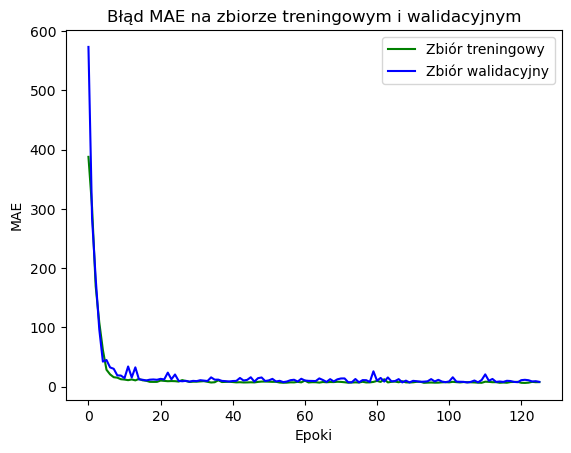

7.2862725257873535


In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

In [70]:
# # --- Zapis ---
# model.save("bug_1d_m1_train.keras")  # od TF 2.12 zalecany format .keras
# # Możesz też użyć starszego formatu HDF5:
# # model.save("model_lstm.h5")

# # --- Wczytanie ---
# loaded_model = keras.models.load_model("bug_1d_m1_train.keras")
# # Teraz możesz np.:
# # loaded_model.evaluate(X_test, y_test)


### l1 i earlystopping M2

In [87]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-5  # lambda karanie wag

model = Sequential([
    Input(shape=(n_steps, X_train.shape[2])),
    LSTM(40, activation='relu',kernel_regularizer=l1(l1_reg)),
    Dense(7, activation='relu',kernel_regularizer=l1(l1_reg)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.009836804915578564)
model.compile(optimizer=optimizer, loss='mae')


In [88]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 383.6022 - val_loss: 564.7061
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 362.7822 - val_loss: 473.9450
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 236.5186 - val_loss: 248.3643
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 164.3082 - val_loss: 193.9742
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 123.6573 - val_loss: 125.5135
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.1483 - val_loss: 83.7510
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.9828 - val_loss: 45.0268
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.8069 - val_loss: 53.1125
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.0811 - val_loss: 40.7566
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.0573 - val_loss: 33.2208
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.7608 - val_loss: 25.8447
Epoch 12/200
24/24 ━━━━━━━━━━━

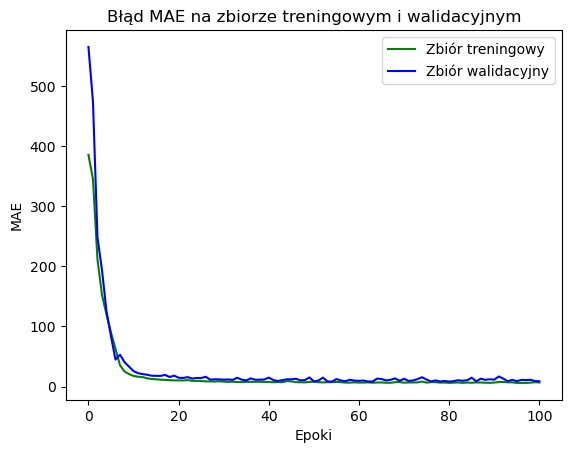

8.409123420715332


In [90]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

In [51]:
# --- Zapis ---
# model.save("bug_1d_m2_train.keras")  # od TF 2.12 zalecany format .keras
# # Możesz też użyć starszego formatu HDF5:
# # model.save("model_lstm.h5")

# # --- Wczytanie ---
# loaded_model = keras.models.load_model("bug_1d_m2_train.keras")
# # Teraz możesz` np.:
# # loaded_model.evaluate(X_test, y_test)


### Actual vs predicted M2

Scatter plots

In [91]:
test_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step


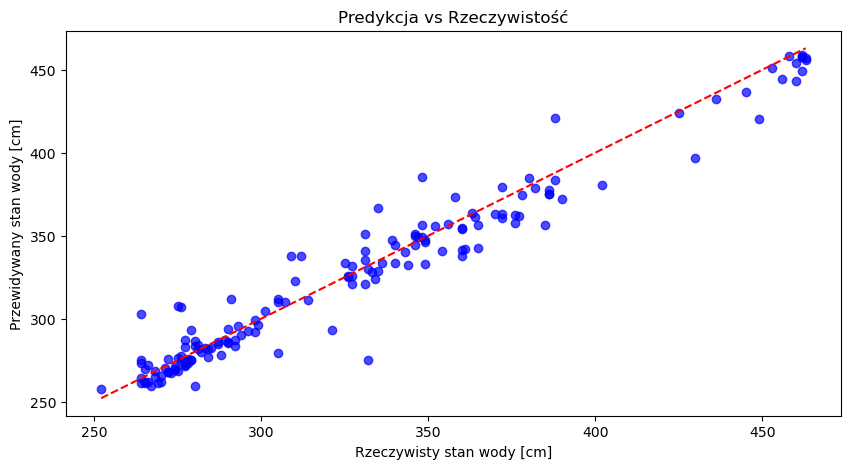

In [92]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość")
plt.show()

Dopasowanie

In [93]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='Prawdziwe dane')
    ax1.plot(predicted_data_flatten, label='Wartości przewidywane', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Stan wody [cm]')
    ax1.set_xlabel('Dni')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
        ax1.set_ylim([200, 800])
    ax1.legend()

In [94]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training MAE
Błąd MAE 6.771919742707284
Validation MAE
Błąd MAE 8.399013495295303
Test MAE
Błąd MAE 8.667479509077731


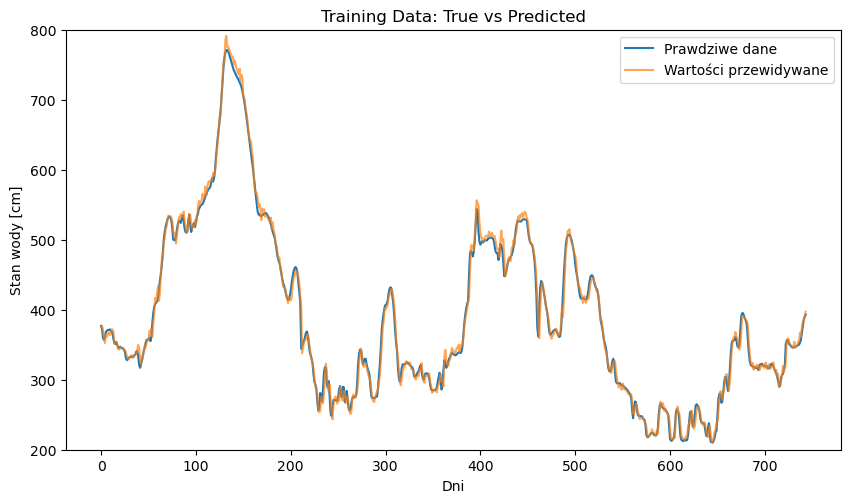

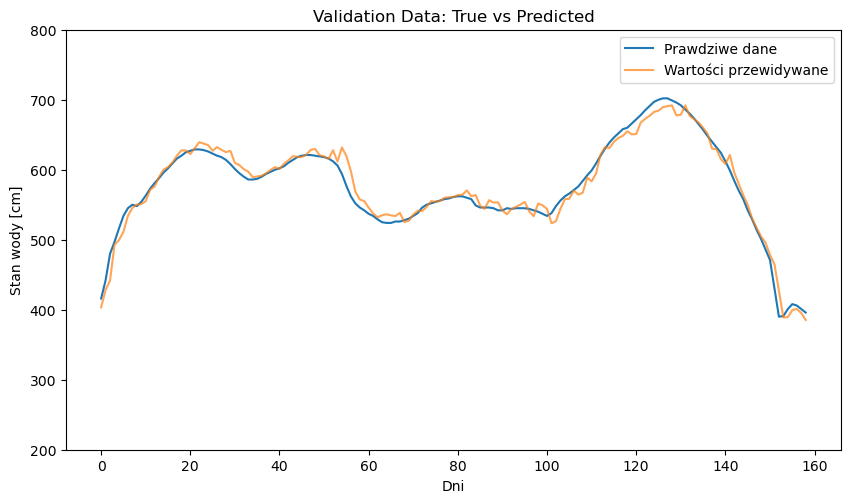

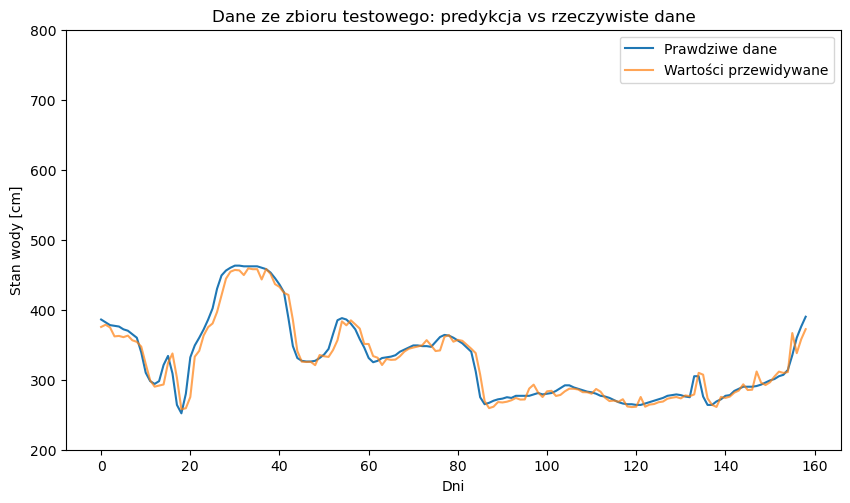

In [95]:
print("Training MAE")
plot_predictions_with_error(y_train, train_pred, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation, validation_pred, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test, test_pred, 'Dane ze zbioru testowego: predykcja vs rzeczywiste dane')

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Unikamy dzielenia przez 0
    return 100 * np.mean(diff)

def evaluate_model(y_true, y_pred):
    # Upewnij się, że dane są spłaszczone
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_score = smape(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"sMAPE: {smape_score:.2f}%")


In [81]:
evaluate_model(y_test, test_pred)

RMSE: 12.3643
R²: 0.9523
sMAPE: 2.49%


### Actual vs predicted M1

Scatter plots

In [75]:
test_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step


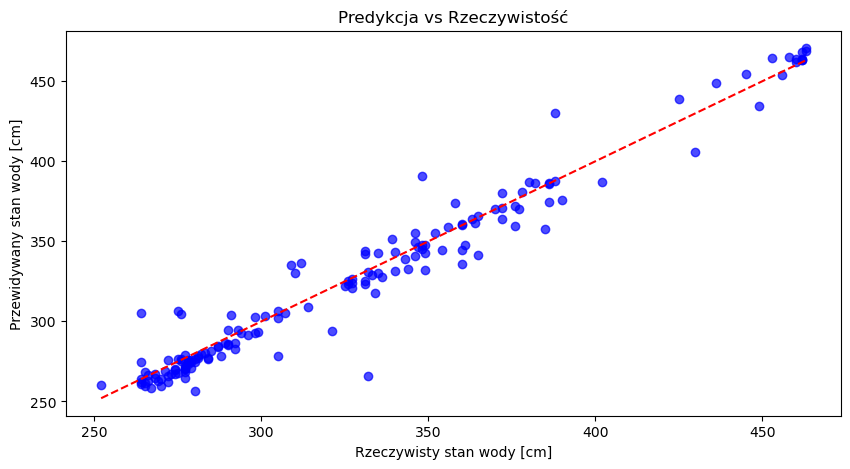

In [76]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość")
plt.show()

Dopasowanie

In [77]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='Prawdziwe dane')
    ax1.plot(predicted_data_flatten, label='Wartości przewidywane', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Stan wody [cm]')
    ax1.set_xlabel('Dni')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
        ax1.set_ylim([200, 800])
    ax1.legend()

In [78]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Training MAE
Błąd MAE 6.687574571178805
Validation MAE
Błąd MAE 7.286271964978872
Test MAE
Błąd MAE 8.05590666764937


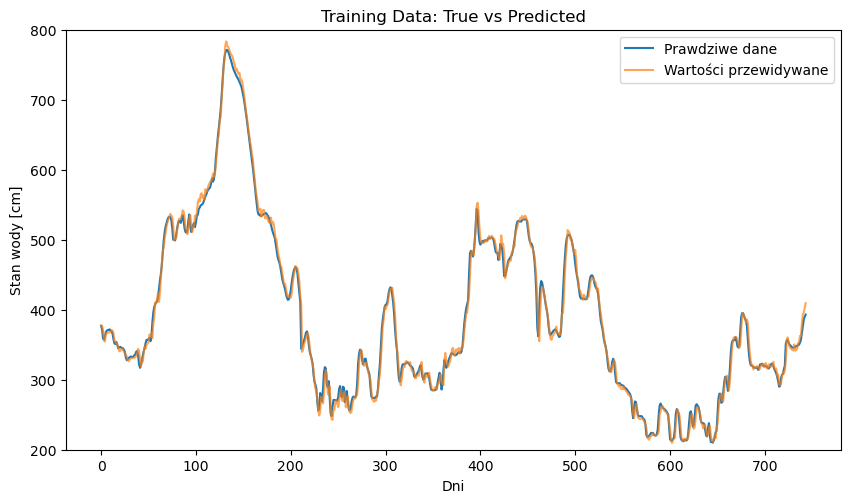

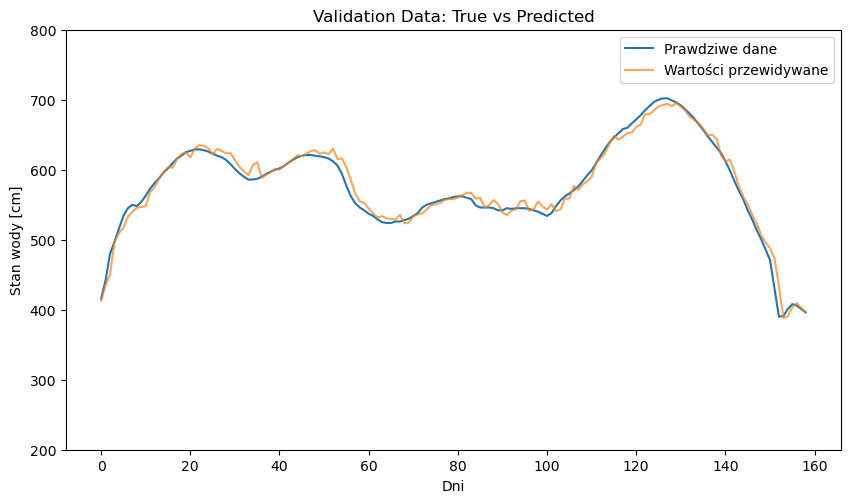

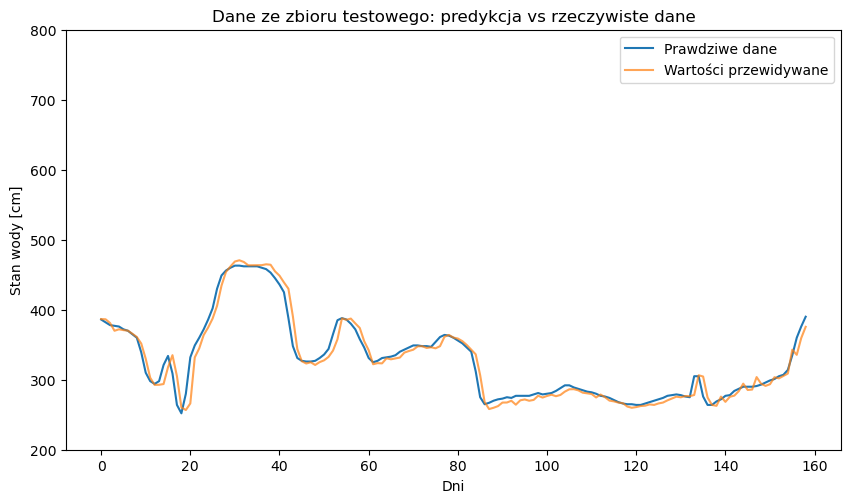

In [79]:
print("Training MAE")
plot_predictions_with_error(y_train, train_pred, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation, validation_pred, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test, test_pred, 'Dane ze zbioru testowego: predykcja vs rzeczywiste dane')

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Unikamy dzielenia przez 0
    return 100 * np.mean(diff)

def evaluate_model(y_true, y_pred):
    # Upewnij się, że dane są spłaszczone
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_score = smape(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"sMAPE: {smape_score:.2f}%")


In [81]:
evaluate_model(y_test, test_pred)

RMSE: 12.3643
R²: 0.9523
sMAPE: 2.49%
